In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = 200
pd.options.display.max_rows = 100
color = sns.color_palette()
sns.set(style="white")

%matplotlib inline

pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns', 500)

In [7]:
users = pd.read_csv("Users_done.csv", low_memory=False, index_col="Num_Acc")

In [8]:
new_users = users.drop(["Unnamed: 0"], axis=1)

In [9]:
for col in new_users.columns:
    new_users = pd.concat([new_users, pd.get_dummies(new_users[col], prefix=col, prefix_sep='_')], axis=1)
    new_users.drop(col, axis=1, inplace=True)

In [10]:
new_users.columns

Index(['ageCateg18_0', 'ageCateg18_1', 'ageCateg65_0', 'ageCateg65_1',
       'grav_0', 'grav_1', 'locp_0', 'locp_1'],
      dtype='object')

In [11]:
cluster_users = new_users.drop(columns=['ageCateg18_0', 'ageCateg65_0', 'grav_0', 'locp_0'], axis=1)

In [12]:
cluster_users.head()

,ageCateg18_1,ageCateg65_1,grav_1,locp_1
Num_Acc,,,,
200500000001,0,0,1,0
200500000002,0,0,1,0
200500000003,0,0,1,0
200500000004,0,1,1,0
200500000005,0,0,1,0


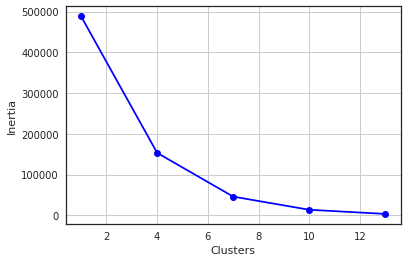

In [14]:
from sklearn.cluster import KMeans

# Range de valores de clusters que vamos testar
k = range(1,15,3)

# Lista de inércias
inertias = []

# Para cada valor de k, ache a inércia
for i in k:
    # crie a instância
    kmeans = KMeans(n_clusters=i, n_jobs=-1)

    # Treine o modelo
    model = kmeans.fit(cluster_users)

    # Ache a inercia dos clusters
    inertias.append(model.inertia_)
    
plt.plot(k, inertias, '-ob')
plt.xlabel('Clusters')
plt.ylabel('Inertia')
plt.grid()
plt.show()

In [17]:
kmeans = KMeans(n_clusters=6, n_jobs=-1)
labels = kmeans.fit_predict(cluster_users)

In [18]:
label, count = np.unique(labels, return_counts=True)
for l, c in zip(label,count):
    print('Cluster {}: {}'.format(l,c))

Cluster 0: 256983
Cluster 1: 348232
Cluster 2: 57942
Cluster 3: 57554
Cluster 4: 53753
Cluster 5: 65521


In [19]:
clusters_n = kmeans.labels_.astype(np.int)

In [20]:
clusters_n

array([0, 0, 0, ..., 1, 1, 1])

In [21]:
new_users["cluster"] = clusters_n
new_users.groupby("cluster").mean()

,ageCateg18_0,ageCateg18_1,ageCateg65_0,ageCateg65_1,grav_0,grav_1,locp_0,locp_1
cluster,,,,,,,,
0,0.895335,0.104665,1.000000,0.000000,0.0,1.0,1.00000,0.00000
1,0.919551,0.080449,1.000000,0.000000,1.0,0.0,1.00000,0.00000
2,0.936505,0.063495,0.000000,1.000000,1.0,0.0,0.80301,0.19699
3,0.937068,0.062932,0.810352,0.189648,0.0,1.0,0.00000,1.00000
4,0.921809,0.078191,0.000000,1.000000,0.0,1.0,1.00000,0.00000
5,0.945147,0.054853,1.000000,0.000000,1.0,0.0,0.00000,1.00000


In [22]:
new_users.head()

,ageCateg18_0,ageCateg18_1,ageCateg65_0,ageCateg65_1,grav_0,grav_1,locp_0,locp_1,cluster
Num_Acc,,,,,,,,,
200500000001,1,0,1,0,0,1,1,0,0
200500000002,1,0,1,0,0,1,1,0,0
200500000003,1,0,1,0,0,1,1,0,0
200500000004,1,0,0,1,0,1,1,0,4
200500000005,1,0,1,0,0,1,1,0,0


In [23]:
cluster_users["cluster_users"] = clusters_n
cluster_users.head()

,ageCateg18_1,ageCateg65_1,grav_1,locp_1,cluster_users
Num_Acc,,,,,
200500000001,0,0,1,0,0
200500000002,0,0,1,0,0
200500000003,0,0,1,0,0
200500000004,0,1,1,0,4
200500000005,0,0,1,0,0


In [24]:
cluster_users.to_csv("users_with_clusters.csv", sep=',')